# House Price Prediction using Advanced Regression Techniques

Task 1: Data Understanding:

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
!pip install scikit-learn==1.3.0

In [3]:
#loading the csv file 
home = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\data science asg nd notes\Internship\Model Deployment 5\data.csv")

In [4]:
#cheking the dataset 
home.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
#cheking the shape of the datset
home.shape

(4600, 18)

In [6]:
#statistical dicription of numerical and categorical data
home.describe(include ="all")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


In [7]:
#cheking the information of the datatypes and null values
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Task 2: Data Cleaning:

In [8]:
#converting the datatypes of the columns where needed
home["date"] = pd.to_datetime(home["date"])
home["price"] = home["price"].astype("int64")
home["bedrooms"] = home["bedrooms"].astype("int64")
home["bathrooms"] = home["bathrooms"].astype("int64")
home["floors"] = home["floors"].astype("int64")
home["floors"] = home["floors"].astype("int64")
home["street"] = home["street"].astype("string")
home["city"] = home["city"].astype("string")
home['statezip']  = home['statezip'].astype('string')
home["country"] = home["country"].astype("string")

In [9]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   int64         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   string        
 15  city           4600 n

In [10]:
#checking for duplicate values
home.drop_duplicates()
home.shape

(4600, 18)

THERE ARE NO DUPLICATE VALUES

working on column PRICE

In [11]:
#finding the number of 0's in price column
zero_p = (home.price==0).sum()
print(zero_p)

49


In [12]:
#dropping the null values in price column
home['price'].replace(0, np.nan, inplace = True)
home.dropna(inplace = True)

In [13]:
home.shape

(4551, 18)

In [14]:
#working on Date column

In [15]:
home.insert(1, "Year" , home.date.dt.year)

In [16]:
home.head()

,date,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [17]:
# dropping uneccesary columns
home.drop(["date", "street", "country"], axis =1, inplace = True)

In [18]:
home.drop('city', axis=1, inplace= True)

In [19]:
home.head()

,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,WA 98133
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,WA 98119
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,WA 98042
3,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,WA 98008
4,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,WA 98052


In [20]:
home.shape

(4551, 15)

In [21]:
## Number of unique value counts in the dataset
home.nunique(axis = 0)

Year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
statezip           77
dtype: int64

In [22]:
## Checking dtype of the dataset
home.dtypes

Year                      int32
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
statezip         string[python]
dtype: object

In [23]:
# Treating 'statezip' column and extracting the numeric code only
home['statezip'] = home['statezip'].str.split().str[1]

In [24]:
home['statezip'] = home["statezip"].astype("int64")

In [25]:
home.dtypes

Year               int32
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
statezip           int64
dtype: object

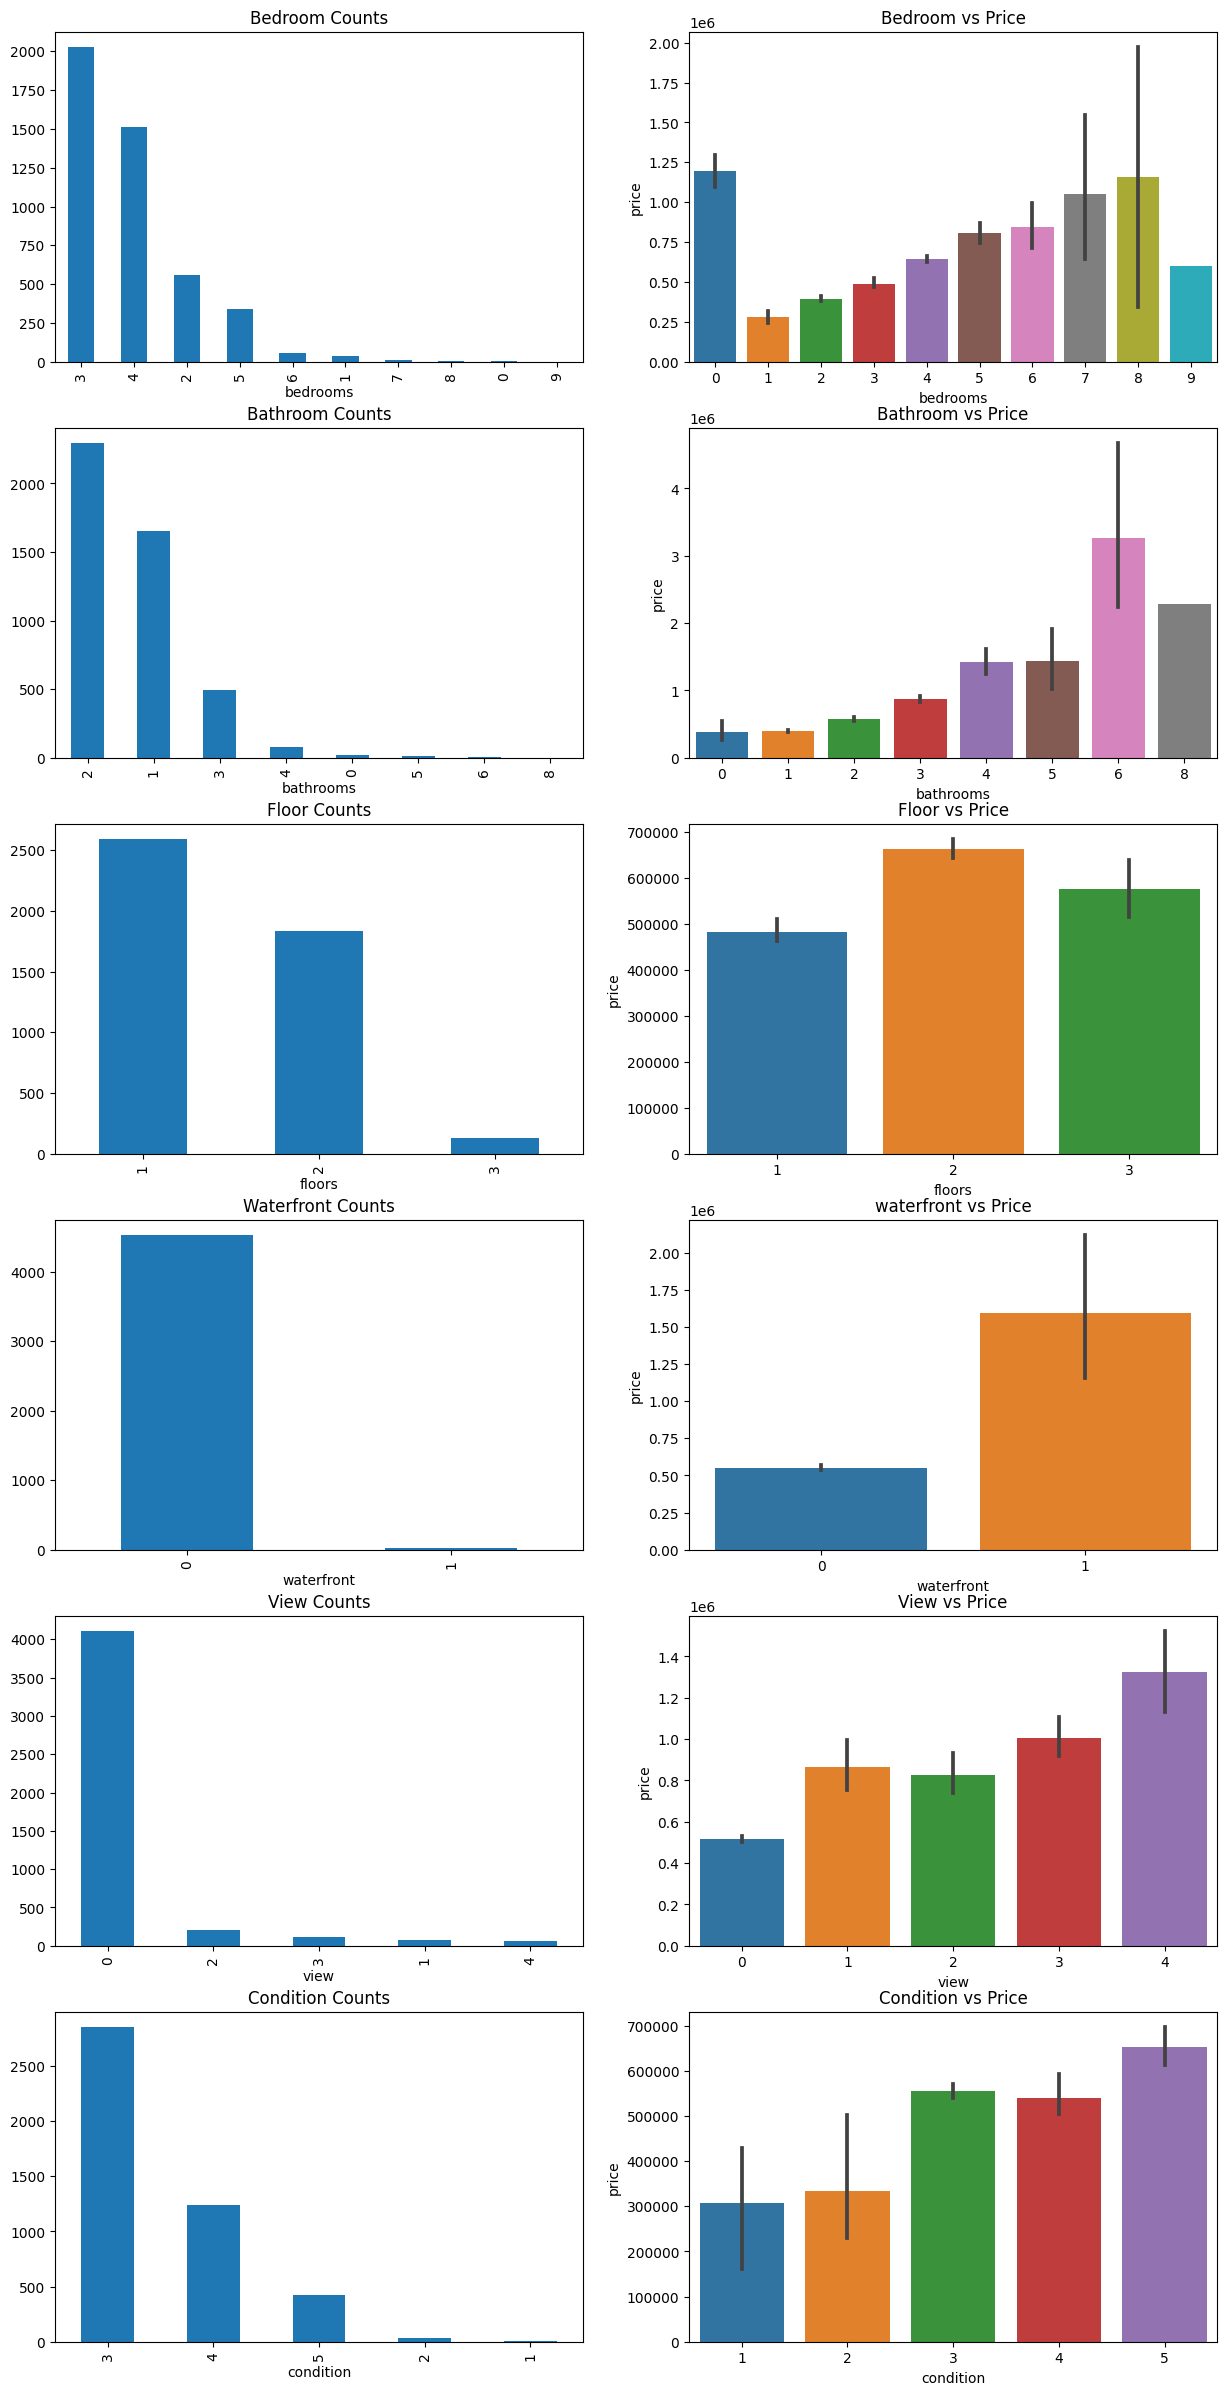

In [26]:
# Univariate & Bivariant analysis of categorical columns
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
pd.value_counts(home['bedrooms']).plot(kind='bar')
plt.title("Bedroom Counts")

plt.subplot(6, 2, 2)
sns.barplot(x = home['bedrooms'], y = home["price"])
plt.title("Bedroom vs Price")

plt.subplot(6, 2, 3)
pd.value_counts(home['bathrooms']).plot(kind='bar')
plt.title("Bathroom Counts")

plt.subplot(6, 2, 4)
sns.barplot(x = home['bathrooms'], y = home["price"])
plt.title("Bathroom vs Price")

plt.subplot(6, 2, 5)
pd.value_counts(home['floors']).plot(kind='bar')
plt.title("Floor Counts")

plt.subplot(6, 2, 6)
sns.barplot(x = home['floors'], y = home["price"])
plt.title("Floor vs Price")

plt.subplot(6, 2, 7)
pd.value_counts(home['waterfront']).plot(kind='bar')
plt.title("Waterfront Counts")

plt.subplot(6, 2, 8)
sns.barplot(x = home['waterfront'], y = home["price"])
plt.title("waterfront vs Price")

plt.subplot(6, 2, 9)
pd.value_counts(home['view']).plot(kind='bar')
plt.title("View Counts")

plt.subplot(6, 2, 10)
sns.barplot(x = home['view'], y = home["price"])
plt.title("View vs Price")

plt.subplot(6, 2, 11)
pd.value_counts(home['condition']).plot(kind='bar')
plt.title("Condition Counts")

plt.subplot(6, 2, 12)
sns.barplot(x = home['condition'], y = home["price"])
plt.title("Condition vs Price")

plt.show()


HANDLING OUTLIERS

C:\Users\Dell\AppData\Local\Temp\ipykernel_12116\1081838249.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home['price'],color="green",kde=True)


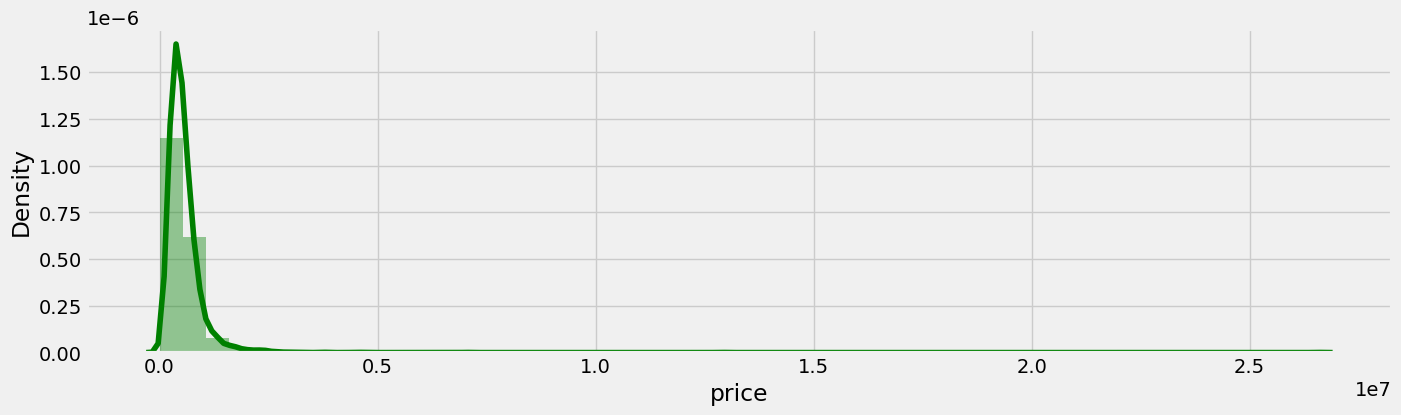

In [27]:
# Checking distribution of price
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,4)

sns.distplot(home['price'],color="green",kde=True)
plt.show()

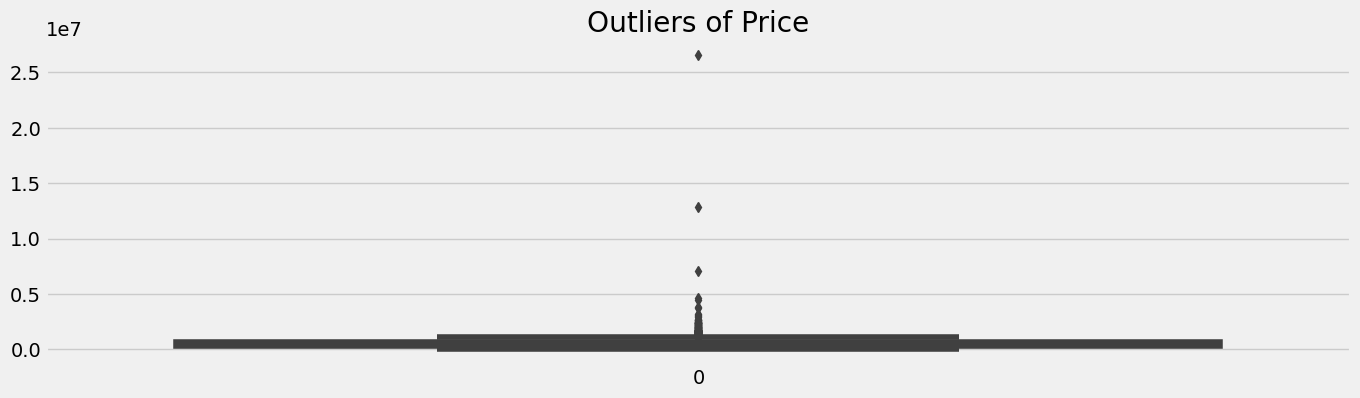

In [28]:
# Lets visualize the outliers using box-plot
sns.boxplot(home['price'])
plt.title('Outliers of Price')
plt.show()

OUTLIERS ARE CLEARLY VISIBLE

In [29]:
# process of finding and removing the outliers begins
#Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = home['price'].quantile(0.25)
Q3 = home['price'].quantile(0.75)

IQR = Q3-Q1
print(IQR)

331236.0


In [30]:
# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Find the outliers in the column
outliers = home[(home['price'] < lower_bound) | (home['price'] > upper_bound)]
print(len(outliers))
outliers.head()

240


,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,98119
11,2014,1400000.0,4,2,2920,4000,1,0,0,5,1910,1010,1909,1988,98105
14,2014,1200000.0,5,2,2910,9480,1,0,0,3,2910,0,1939,1969,98105
99,2014,1395000.0,5,3,4010,8510,2,0,1,5,2850,1160,1971,0,98105
122,2014,2280000.0,7,8,13540,307752,3,0,4,3,9410,4130,1999,0,98053


In [31]:
#converting the outliers with nan values
home['price'][outliers.index] = np.nan

C:\Users\Dell\AppData\Local\Temp\ipykernel_12116\2101937291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['price'][outliers.index] = np.nan


In [32]:
# Lets check again the total number of missing values in the 'price' column
home['price'].isnull().sum()

240

In [33]:
# Fill the NaN values with the mean

# Calculate the mean value (rounded to 0 decimal places)
mean_value = round(home['price'].mean())
print(mean_value)
# Fill null values with the rounded mean value
home['price'].fillna(mean_value, inplace=True)

487457


In [34]:
home.head()

,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,98133
1,2014,487457.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,98119
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,98042
3,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,98008
4,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,98052


C:\Users\Dell\AppData\Local\Temp\ipykernel_12116\3725790030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home['price'],color="green",kde=True)


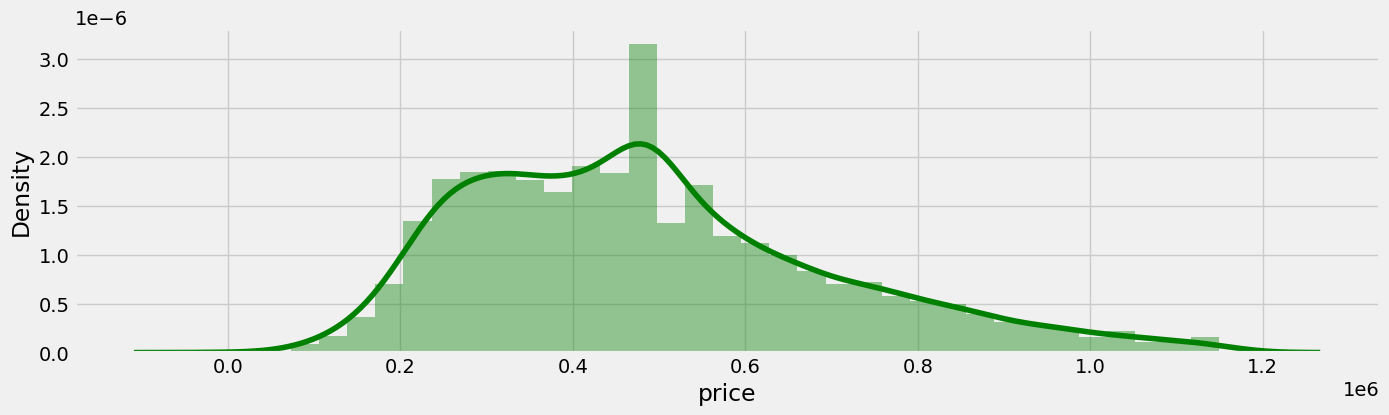

In [35]:
#checking distribution of price now
sns.distplot(home['price'],color="green",kde=True)
plt.show()

Task 3: Feature Engineering:

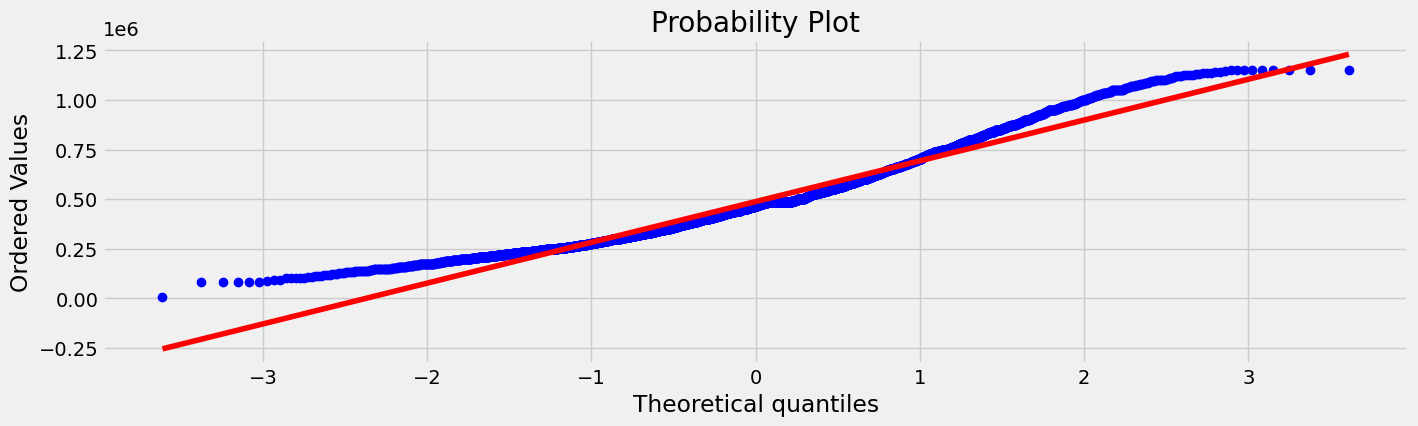

In [36]:
#by plotting the Q-Q plot lets see if the target variable is linear in nature or not

# Plotting QQ-plot
fig = plt.figure()
res = stats.probplot(home['price'], plot=plt)
plt.show()

Clearly Target variable(price) is skewed, so lets apply lof function to make it linear

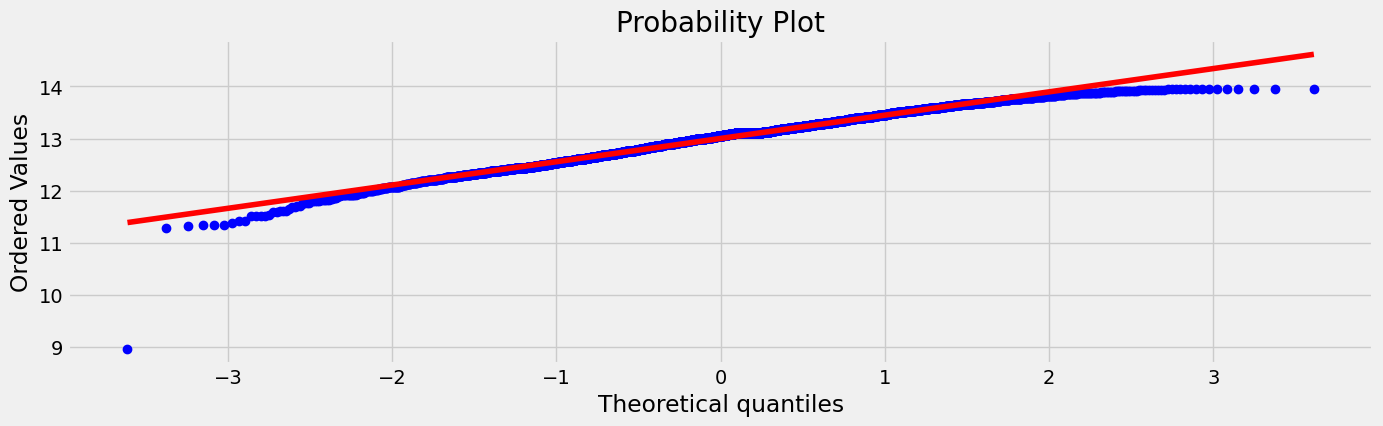

In [37]:
# Applying log-transformation
home['price'] = np.log(home['price'])

#lets check the Q-Q plot now
fig = plt.figure()
res = stats.probplot(home['price'], plot=plt)
plt.show()

PERFORMING LABEL ENCODING

In [38]:
# Applying Label encoding on independent variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

home['bedrooms'] = label_encoder.fit_transform(home['bedrooms'])
home['bathrooms'] = label_encoder.fit_transform(home['bathrooms'])
home['price'] = label_encoder.fit_transform(home['price'])
home['sqft_living'] = label_encoder.fit_transform(home['sqft_living'])
home['sqft_lot'] = label_encoder.fit_transform(home['sqft_lot'])
home['sqft_above'] = label_encoder.fit_transform(home['sqft_above'])
home['sqft_basement'] = label_encoder.fit_transform(home['sqft_basement'])
home['yr_built'] = label_encoder.fit_transform(home['yr_built'])
home['yr_renovated'] = label_encoder.fit_transform(home['yr_renovated'])

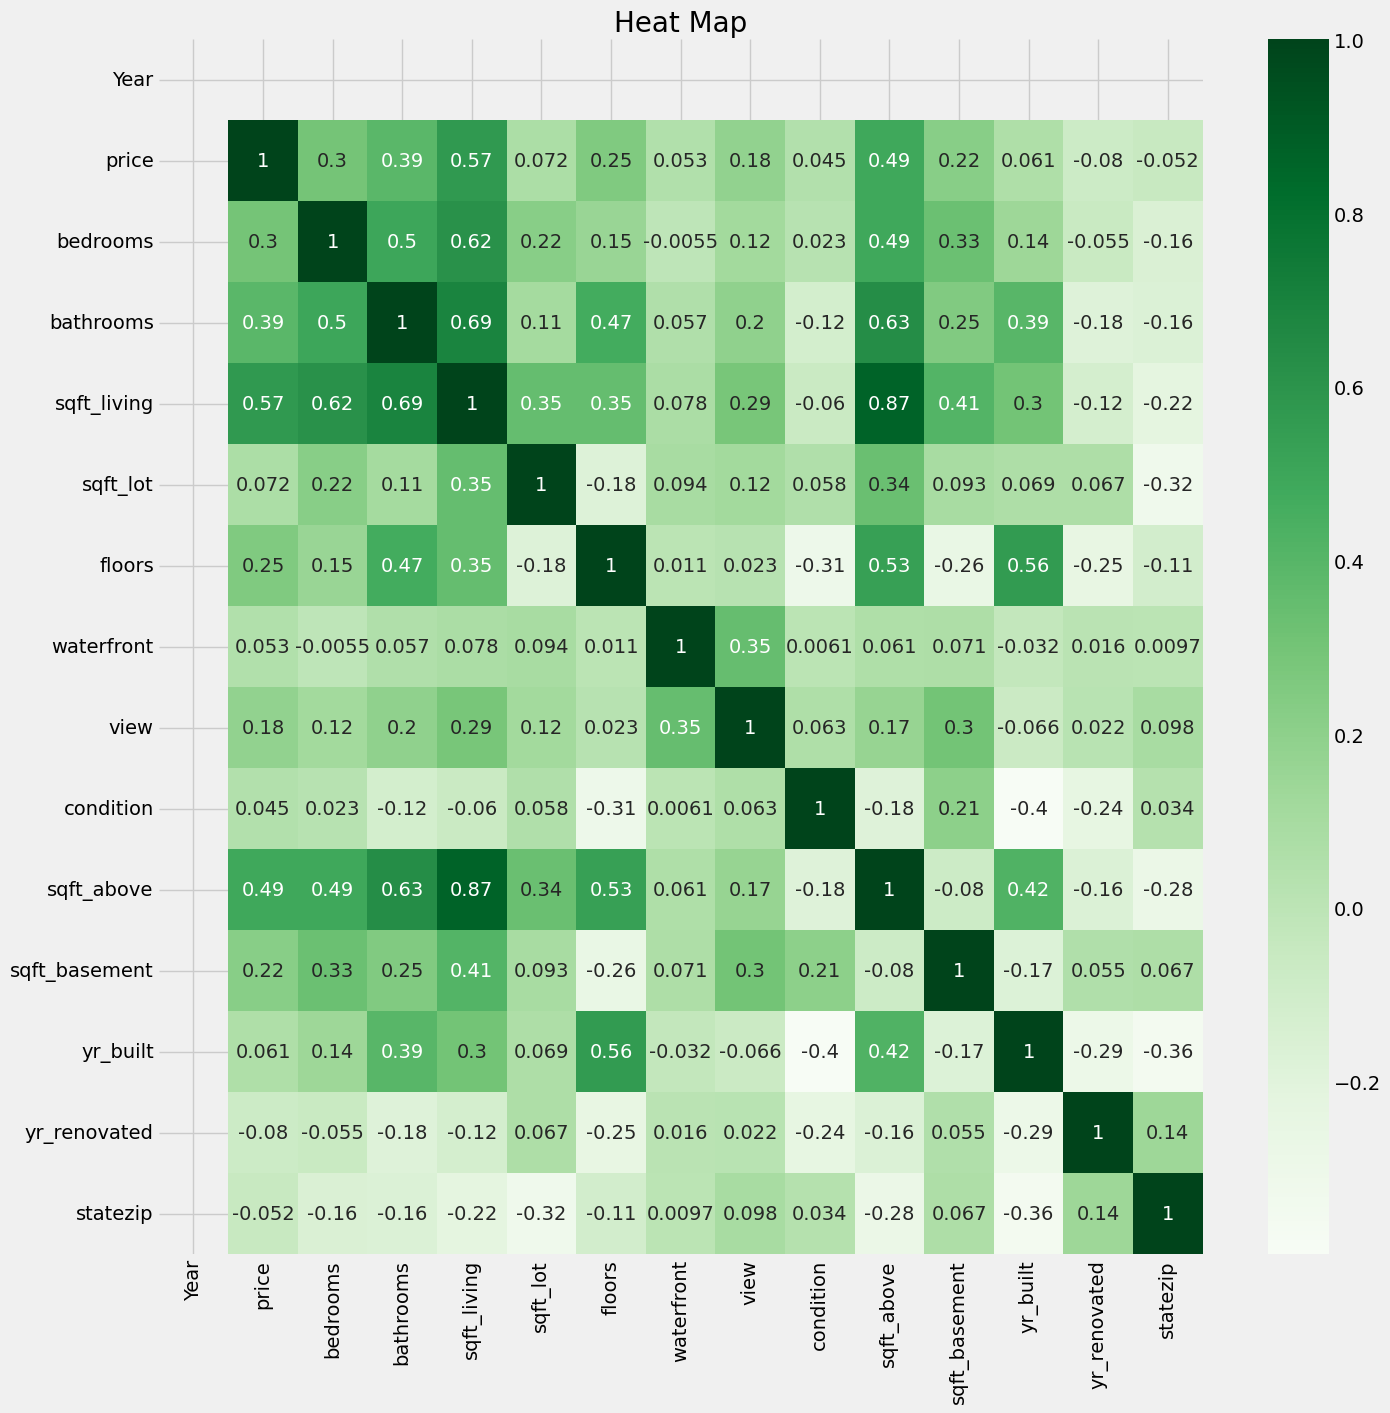

In [39]:
# Creating heatmap to check the correlation in the dataset
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(home.corr(), annot=True, cmap="Greens")
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [40]:
df= home.copy()
home.head()

,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,2014,401,3,1,93,1391,1,0,0,3,96,0,55,49,98133
1,2014,866,5,2,406,1691,2,0,4,5,373,29,21,0,98119
2,2014,486,3,2,180,2185,1,0,0,4,182,0,66,0,98042
3,2014,705,3,2,191,1431,1,0,0,4,52,109,63,0,98008
4,2014,998,4,2,181,2016,1,0,0,4,70,85,76,36,98052


In [41]:
df.dtypes

Year             int32
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
statezip         int64
dtype: object

Task 5: Model Training and Evaluation:

In [42]:
#Splitting the Data into target and independent variables
x = df.drop(['price'], axis = 1)
y = df['price']

print(x.head())
print(y.head())

   Year  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view   
0  2014         3          1           93      1391       1           0     0  \
1  2014         5          2          406      1691       2           0     4   
2  2014         3          2          180      2185       1           0     0   
3  2014         3          2          191      1431       1           0     0   
4  2014         4          2          181      2016       1           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  statezip  
0          3          96              0        55            49     98133  
1          5         373             29        21             0     98119  
2          4         182              0        66             0     98042  
3          4          52            109        63             0     98008  
4          4          70             85        76            36     98052  
0    401
1    866
2    486
3    705
4    998
Name: price,

In [43]:
df.head()

,Year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,2014,401,3,1,93,1391,1,0,0,3,96,0,55,49,98133
1,2014,866,5,2,406,1691,2,0,4,5,373,29,21,0,98119
2,2014,486,3,2,180,2185,1,0,0,4,182,0,66,0,98042
3,2014,705,3,2,191,1431,1,0,0,4,52,109,63,0,98008
4,2014,998,4,2,181,2016,1,0,0,4,70,85,76,36,98052


In [44]:
# Perform train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3185, 14)
(3185,)
(1366, 14)
(1366,)


FEATURE SCALING

In [45]:
# Perform standardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std

StandardScaler()

In [46]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

MODEL TRAINING

In [47]:
# 1. Creating a  Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred1 = LR.predict(x_test)

# 2. Creating a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)
y_pred2 = RF.predict(x_test)

# 3. Creating a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
y_pred3 = GB.predict(x_test)

# 4. Creating a SVR Model
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train, y_train)
y_pred4 = svm.predict(x_test)

# 5. Creating a Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred5 = DT.predict(x_test)

# 6. Creating Ridge Model
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred6 = ridge.predict(x_test)


EVALUATION METRICS

In [48]:
# Checking Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

r2_score1 = r2_score(y_test, y_pred1)
r2_score2 = r2_score(y_test, y_pred2)
r2_score3 = r2_score(y_test, y_pred3)
r2_score4 = r2_score(y_test, y_pred4)
r2_score5 = r2_score(y_test, y_pred5)
r2_score6 = r2_score(y_test, y_pred6)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
mse6 = mean_squared_error(y_test, y_pred6)


rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)


print("Linear Regression R2 Score :", r2_score1)
print("Linear Regression MSE :", mse1)
print("Linear Regression RMSE :", rmse1)
print()
print("Random Forest R2 Score :", r2_score2)
print("Random Forest MSE :", mse2)
print("Random Forest RMSE :", rmse2)
print()
print("Gradient Boosting R2 Score :", r2_score3)
print("Gradient Boosting MSE :", mse3)
print("Gradient Boosting RMSE :", rmse3)
print()
print("SVR R2 Score :", r2_score4)
print("SVR MSE :", mse4)
print("SVR RMSE :", rmse4)
print()
print("Decision Tree R2 Score :", r2_score5)
print("Decision Tree MSE :", mse5)
print("Decision Tree RMSE :", rmse5)
print()
print("Ridge R2 Score :", r2_score6)
print("Ridge MSE :", mse6)
print("Ridge RMSE :", rmse6)


Linear Regression R2 Score : 0.39013337398445413
Linear Regression MSE : 99735.71700595364
Linear Regression RMSE : 315.8096214588049

Random Forest R2 Score : 0.6390385909605005
Random Forest MSE : 59030.52143915171
Random Forest RMSE : 242.96197529480145

Gradient Boosting R2 Score : 0.6485453168483575
Gradient Boosting MSE : 57475.82065317968
Gradient Boosting RMSE : 239.74115344091362

SVR R2 Score : 0.20842765819300713
SVR MSE : 129451.31231068517
SVR RMSE : 359.7934300549208

Decision Tree R2 Score : 0.32546932968525477
Decision Tree MSE : 110310.67642752563
Decision Tree RMSE : 332.1305111360979

Ridge R2 Score : 0.39043285403274375
Ridge MSE : 99686.7409576326
Ridge RMSE : 315.73207147458527


In [49]:
#checking model scores

print("Linear Regression : " ,LR.score(x_test,y_test))
print("Random Forest : " ,RF.score(x_test,y_test))
print("Gradient Boosting : ", GB.score(x_test,y_test))
print("SVR : ",svm.score(x_test,y_test))
print("Decision Tree : ", DT.score(x_test,y_test))
print(" Ridge : " ,ridge.score(x_test,y_test))


Linear Regression :  0.39013337398445413
Random Forest :  0.6390385909605005
Gradient Boosting :  0.6485453168483575
SVR :  0.20842765819300713
Decision Tree :  0.32546932968525477
 Ridge :  0.39043285403274375


Task 6: Model Optimization:

CROSS VALIDATION TECHNIQUE

In [50]:
# Calculate the train and test scores of XGBRegressor model
train_score = RF.score(x_train, y_train)
test_score = RF.score(x_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9520746035753689
Testing Score: 0.6390385909605005


In [51]:
# Performing cross validaion
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF, x, y, cv=5)
print(scores)
print("Mean of all scores: ",scores.mean())

[0.70568006 0.66527265 0.6843625  0.6781382  0.5882437 ]
Mean of all scores:  0.6643394204197688


In [52]:
# Creating dataframe for Models with scores
final_data = pd.DataFrame({'Models':['Linear Regression', 'Random Forest Regressor', 
                'Gradient Boosting Regressor', 'SVR', 'DecisionTreeRegressor', 
                                     'Ridge'], 
                        'R2_Score': [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5,
                                     r2_score6]})

models_df = pd.DataFrame(final_data)

# Sort the DataFrame based on R2_Score in descending order
models_df_sorted = models_df.sort_values(by='R2_Score', ascending=False)
models_df_sorted

,Models,R2_Score
2,Gradient Boosting Regressor,0.648545
1,Random Forest Regressor,0.639039
5,Ridge,0.390433
0,Linear Regression,0.390133
4,DecisionTreeRegressor,0.325469
3,SVR,0.208428


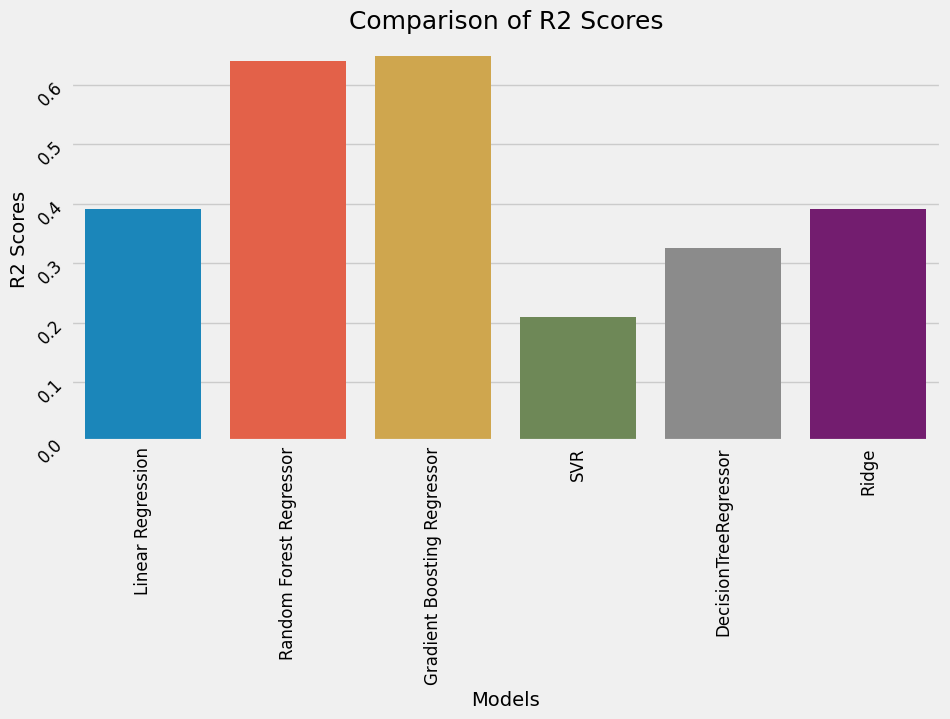

In [53]:
# Visualize the scores on barplot
plt.figure(figsize = (10, 5))
sns.barplot(x = final_data['Models'],y =final_data['R2_Score'])

# Set the axis labels and title
plt.xlabel('Models', fontsize= 14)
plt.ylabel('R2 Scores', fontsize= 14)
plt.xticks(fontsize= 12, rotation = 90)
plt.yticks(fontsize= 12, rotation = 45)
plt.title('Comparison of R2 Scores', fontsize = 18)
plt.show()

Task 7: MODEL DEPLOYMENT STEP:

CREATING A PICKLE FILE

In [54]:
import pickle 
pickle.dump(RF,open("model_rf.pkl", 'wb'))